Lets do some data graphing!! WHOOP WHOOP - next week after this brief intro to pandas we move onto LINEAR REGRESSIONS!! WHOOP WHOOP
https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
url = "https://raw.githubusercontent.com/Julia-Susser/l/master/input/h%20(1).csv"

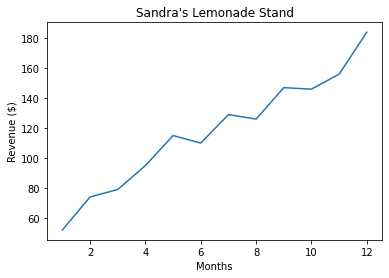

In [25]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

plt.plot(months, revenue, "o")

plt.title("Sandra's Lemonade Stand")

plt.xlabel("Months")
plt.ylabel("Revenue ($)")

plt.show()

###LINES plt.plot(months, revenue)

In [ ]:
#YOU PLOT NOW


In [30]:

df = pd.read_csv(url, index_col=0)
df.head()


,Year,3digit occupation,2digit occupation,1digit occupation,Age,Asecwt,Exp,Male,Female,White,Exp2,1digit industry,Big_firm,Education,Annual hours,Wage,Years_school
0,1983,754,18,6,42,568,24,1,0,1,576,2,0,40,2080,13.0,9.0
1,1983,745,18,6,52,575,34,0,1,1,1156,3,0,40,1960,7.0,9.0
2,1983,745,18,6,50,586,32,1,0,1,1024,3,0,40,2080,15.0,9.0
3,1983,727,18,6,31,603,13,1,0,1,169,3,0,40,1980,11.0,9.0
4,1983,734,18,6,30,688,12,1,0,1,144,3,0,40,2208,7.0,9.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778909 entries, 0 to 778908
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               778909 non-null  int64  
 1   3digit occupation  778909 non-null  int64  
 2   2digit occupation  778909 non-null  int64  
 3   1digit occupation  778909 non-null  int64  
 4   Age                778909 non-null  int64  
 5   Asecwt             778909 non-null  int64  
 6   Exp                778909 non-null  int64  
 7   Male               778909 non-null  int64  
 8   Female             778909 non-null  int64  
 9   White              778909 non-null  int64  
 10  Exp2               778909 non-null  int64  
 11  1digit industry    778909 non-null  int64  
 12  Big_firm           778909 non-null  int64  
 13  Education          778909 non-null  int64  
 14  Annual hours       778909 non-null  int64  
 15  Wage               778909 non-null  float64
 16  Ye

Text(0.5, 1.0, 'Average Annual Hours by Year')

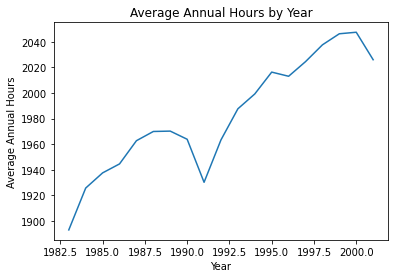

In [33]:
years = []
wages = []
grouped = df.groupby("Year").mean()["Annual hours"].reset_index()
plt.plot(grouped["Year"], grouped["Annual hours"])
plt.xlabel("Year")
plt.ylabel("Average Annual Hours")
plt.title("Average Annual Hours by Year")


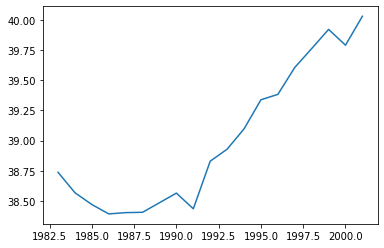

In [34]:

grouped = df.groupby("Year").mean()["Age"].reset_index()
grouped.columns = ["Year","Age"]
plt.plot(grouped["Year"], grouped["Age"])



In [ ]:
#TRY IT WITH WAGE
grouped = df.groupby(----).mean()[----].reset_index()
grouped.columns = -----
plt.plot(------)

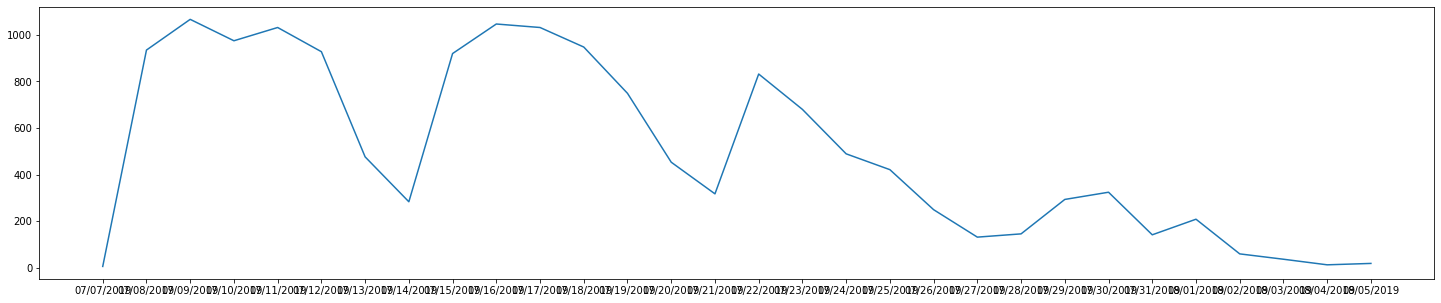

In [22]:
#TRY IT WITH NEW DATASET
#GOVERNMENT COMPLAINTS
#Date received - count
plt.figure(figsize=[25,5])
url = "https://raw.githubusercontent.com/Julia-Susser/hacking-club/master/input/complaints.csv"
df = -------
grouped = df.----(------).count()["Product"].reset_index()
plt.plot(----------)





"""plt.figure(figsize=[25,5])
url = "https://raw.githubusercontent.com/Julia-Susser/hacking-club/master/input/complaints.csv"
df = pd.read_csv(url)
grouped = df.groupby("Date received").count()["Product"].reset_index()
plt.plot(grouped["Date received"], grouped["Product"])"""

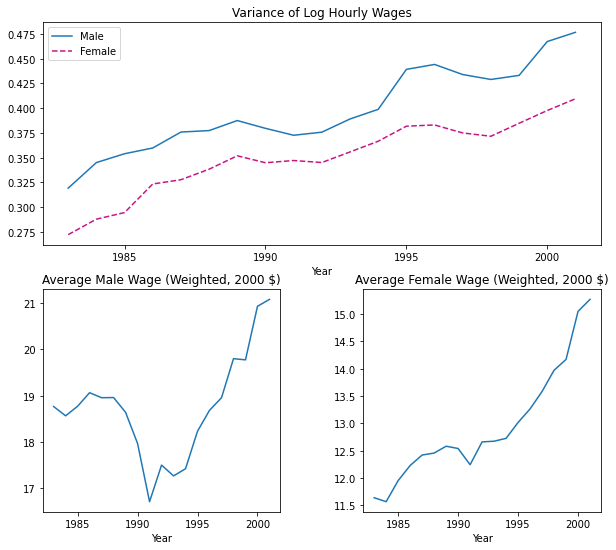

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/Julia-Susser/l/master/input/h%20(1).csv")
hf = pd.read_csv("https://raw.githubusercontent.com/Julia-Susser/Research-Work/master/output/Codes/1digit_occupations.csv", index_col=0)
hf = hf.set_index("codes")
cf = pd.read_csv("https://raw.githubusercontent.com/Julia-Susser/Research-Work/master/output/Codes/2digit_occupations.csv", index_col=0)
cf = cf.set_index("codes")
df = df[(df["Female"]!=0) | (df["Male"]!=0)]

df = df[(df["Female"]!=0) | (df["Male"]!=0)]

grouped = df.groupby(["Female","Year"])
arrays = []

for x in df.sort_values(by="Female")["Female"].unique():
    for y in df.sort_values(by="Year")["Year"].unique():
        arrays.append(grouped.get_group((x,y))[["Female","Year", "Asecwt", "Wage"]].to_numpy())
plt.figure(figsize=[10,10])
years = []
averages = []
digit = 0
for array in arrays:
    values = array[:,-1]
    weights = array[:,2]
    year = array[0,1]
    female = array[0,0]
    average = np.average(values, weights=weights)
    if female != digit:
        plt.subplot(2,2,3)
        plt.plot(years,averages)
        plt.xticks(np.arange(1985, max(years), 5.0))
        plt.xlabel("Year")
        plt.title("Average Male Wage (Weighted, 2000 $)")
        digit = female
        years=[]
        averages=[]
    years.append(year)
    averages.append(average)
plt.subplot(2,2,4)
plt.plot(years,averages)
plt.xticks(np.arange(1985, max(years), 5.0))
plt.xlabel("Year")
plt.title("Average Female Wage (Weighted, 2000 $)")


df["log Wage"] = np.log(df["Wage"])
grouped = df.groupby(["Female","Year"])
arrays = []

for x in df.sort_values(by="Female")["Female"].unique():
    for y in df.sort_values(by="Year")["Year"].unique():
        arrays.append(grouped.get_group((x,y))[["Female","Year", "Asecwt", "log Wage"]].to_numpy())
years = []
variances = []
digit = 1
plt.subplot(2,1,1)
for array in arrays:
    values = array[:,-1]
    weights = array[:,2]
    year = array[0,1]
    female = array[0,0]
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    if female == digit:
        plt.plot(years,variances,label="Male")
        digit = 0
        years=[]
        variances=[]
    years.append(year)
    variances.append(variance)
#sns.set_style("whitegrid")
plt.plot(years,variances,color = "mediumvioletred", linestyle="--",label="Female")
plt.xticks(np.arange(1985, max(years), 5.0))
plt.xlabel("Year")
plt.title("Variance of Log Hourly Wages")
plt.legend()
plt.subplots_adjust(wspace=0.35, bottom=0.2)
